In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
from matplotlib import style

In [44]:
style.use('dark_background')

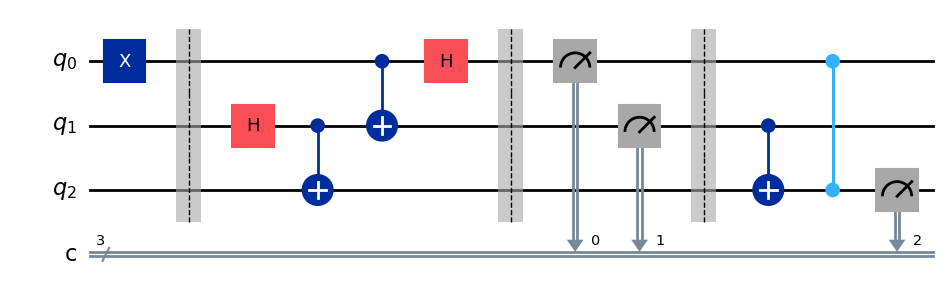

In [45]:
# Otteniamo e stampiamo il circuito quantistico del teletrasporto quantistico
value = "1"
teleportation_circuit = QuantumCircuit(3,3)
if value == "1":
    teleportation_circuit.x(0)
teleportation_circuit.barrier()
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.barrier()
teleportation_circuit.measure([0, 1], [0, 1])
teleportation_circuit.barrier()
teleportation_circuit.cx(1, 2)
teleportation_circuit.cz(0, 2)
teleportation_circuit.measure([2], [2])
teleportation_circuit.draw(output='mpl')

In [46]:
# Esecuzione circuito quantistico
backend = Aer.get_backend('statevector_simulator')
job = transpile(teleportation_circuit, backend=backend)
shots = 1024
result = backend.run(job, shots=shots).result()
counts = result.get_counts(teleportation_circuit)

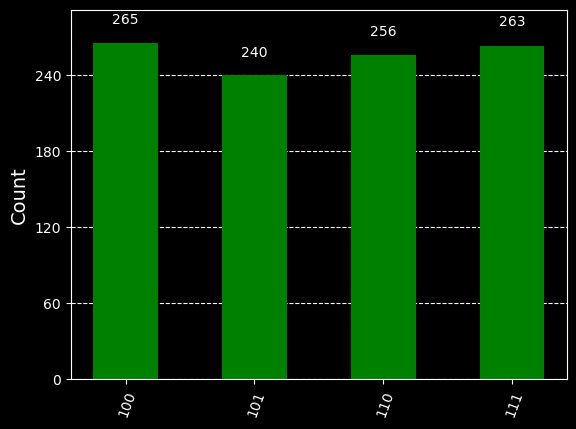

In [47]:
# Visualizzazione istogramma
plot_histogram(counts, color='green')

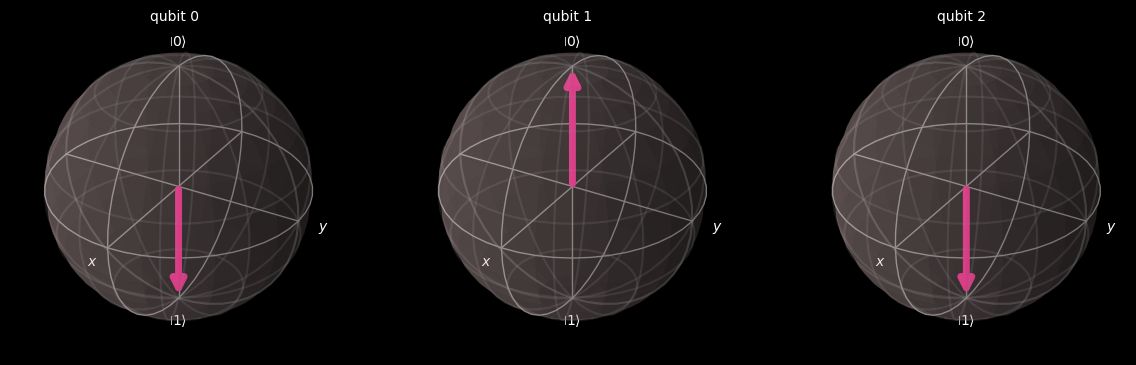

In [48]:
state = result.get_statevector()
plot_bloch_multivector(state)

In [49]:
print(f"valore da teletrasportare: {value}")
print(f"valore teletrasportato: {max(counts, key=counts.get)[0]}")

valore da teletrasportare: 1
valore teletrasportato: 1


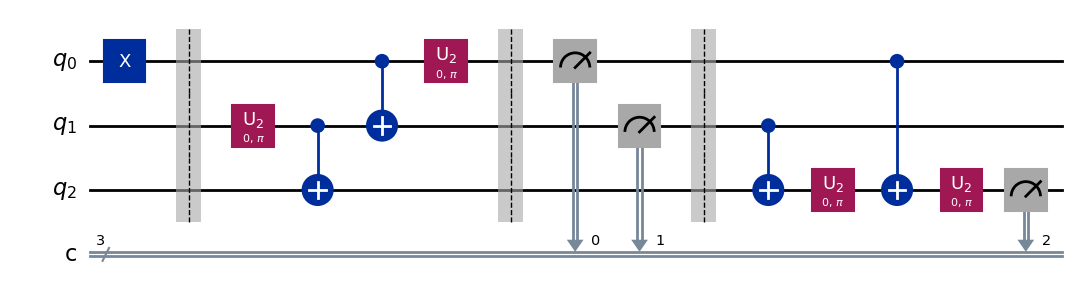

In [51]:
#import matplotlib.pyplot as plt

# Imposta la dimensione della figura
#plt.figure(figsize=(12, 8))
# original
teleportation_circuit = transpile(teleportation_circuit, basis_gates=['u1', 'u2', 'u3', 'rz', 'sx', 'x', 'cx', 'id'], optimization_level=3)
# simple
#teleportation_circuit = transpile(teleportation_circuit, basis_gates=['cx', 'u3'], optimization_level=3)
# ibm_perth
#teleportation_circuit = transpile(teleportation_circuit, basis_gates=['cx', 'id', 'rz', 'sx', 'x'], optimization_level=3)
# ibm_sherbroke
#teleportation_circuit = transpile(teleportation_circuit, basis_gates=['ecr', 'id', 'rz', 'sx', 'x'], optimization_level=3)
# rpcx
#teleportation_circuit = transpile(teleportation_circuit, basis_gates=['cx', 'rx', 'ry', 'rz', 'p'], optimization_level=3)
teleportation_circuit.draw(output = 'mpl', fold=1000)

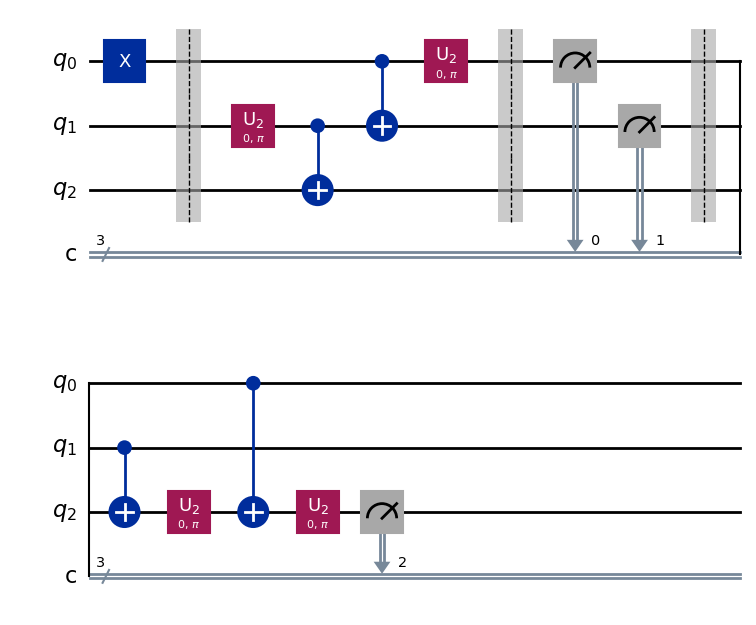

In [53]:
teleportation_circuit.draw(output = 'mpl', fold=10)